In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import glob, os, sys, re, math, random
import xml.etree.ElementTree as ET
from rules import *
from predict import *
from raven_data import load_question, display_problem, load_question2
from tqdm.notebook import tqdm



['constant', 'progression', 'arithmetic', 'distribute_three', 'noise']


  0%|          | 0/1 [00:00<?, ?it/s]

[19 19 21 23 23 25 27 27 29 29 31 33 33 35 35 35 33 33 31 29 29 27 27 25
 23 23 21 19 19]
[  1   1   1   1 149   1   1   6 145   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1  23 126   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1  47 109   1
   1   1   1   1   1   1   1   1   1   1  52 105  53 105  53 104  53 105
   1   1   1   1   1   1 105  53 104  53 105  53 105  52   1   1   1   1
   1   1   1   1   1   1   1 109  47   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 126  23
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 145   6   1
   1 149   1   1   1   1]
[45 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47
 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 45]
[ 3  5  7 11 13 15 19 21 23 27 29 31 33 37 39 41 45 47 49 53 55 55 55 53
 53 53 51 51 51 49 49 49 47 47 47 45 45 45 43 43 43 41 41 41 39 39 39 37
 37 37 35 

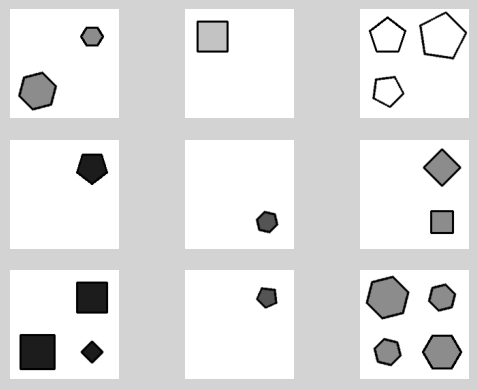

Correct answer: 7


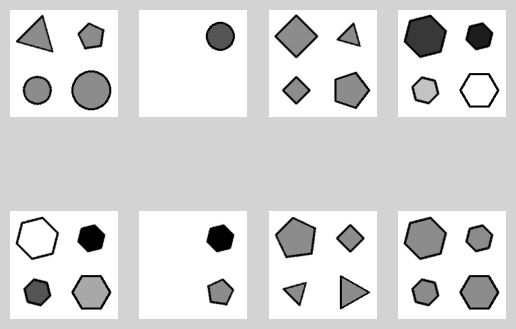

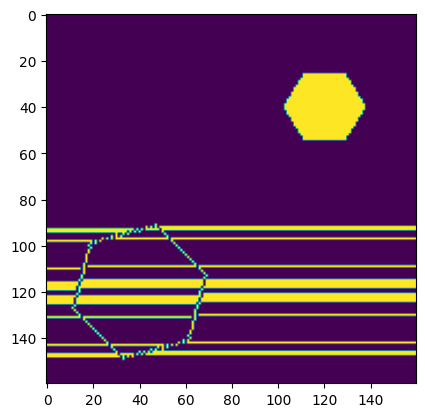

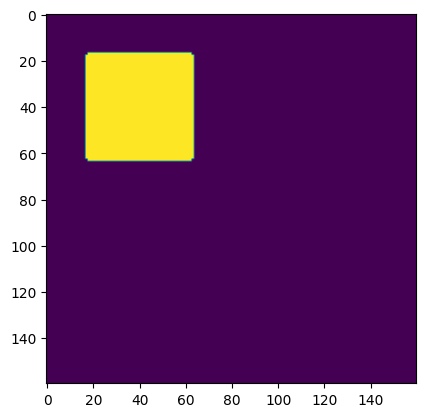

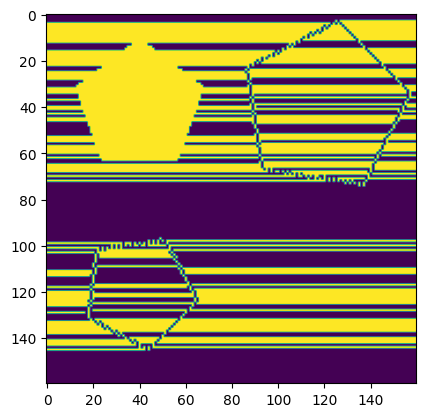

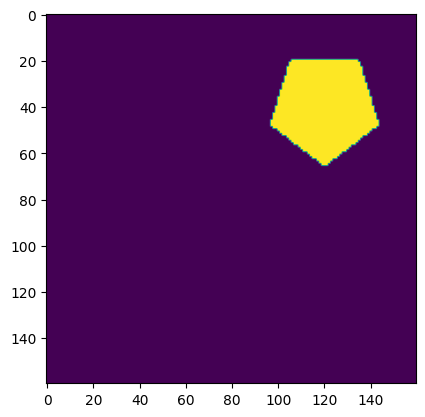

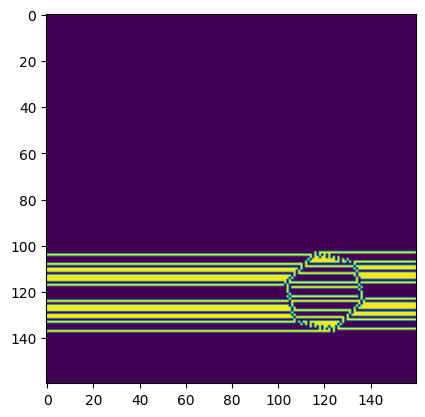

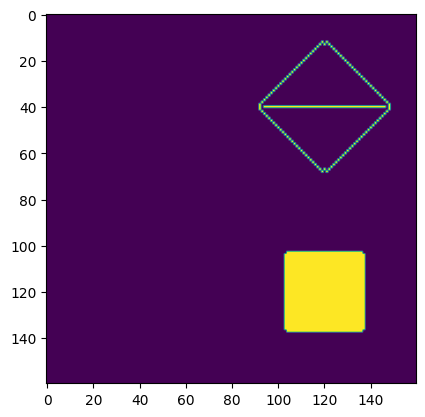

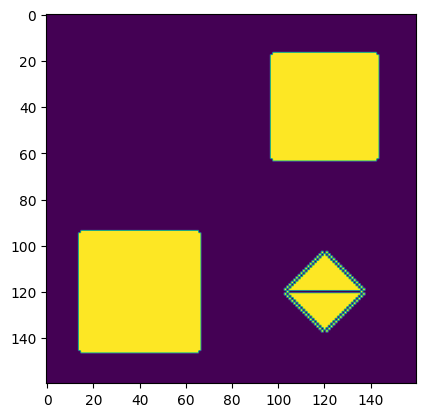

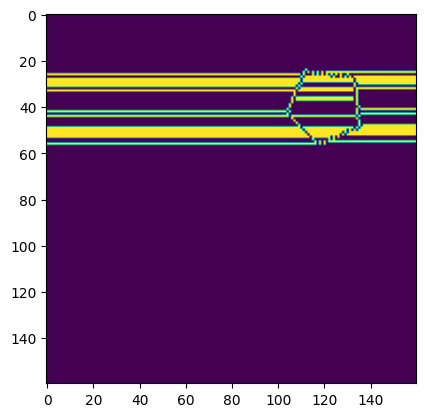

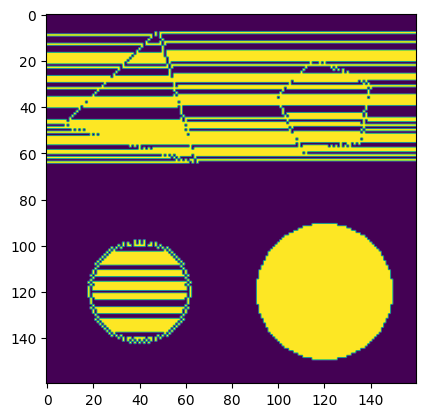

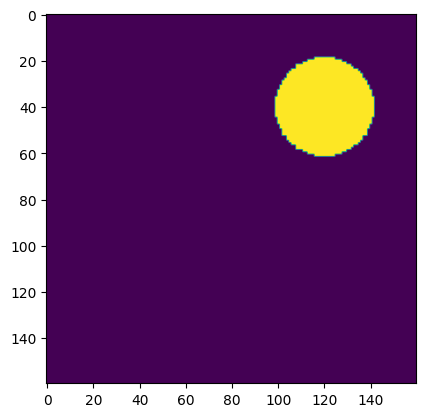

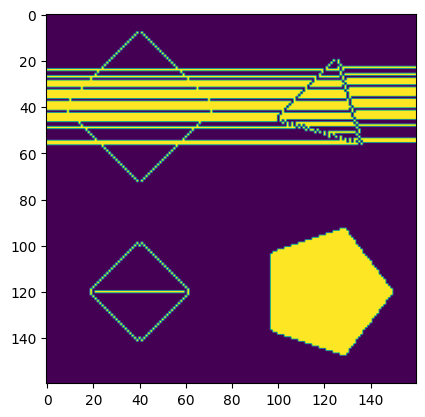

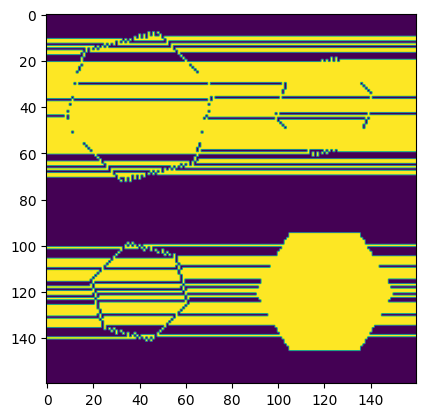

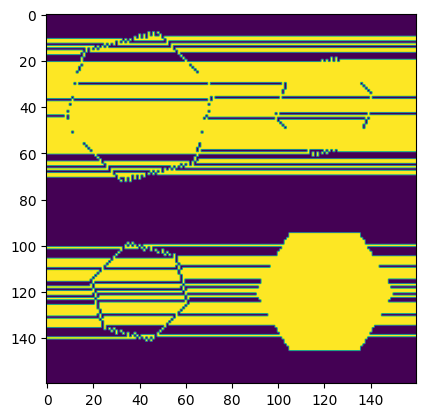

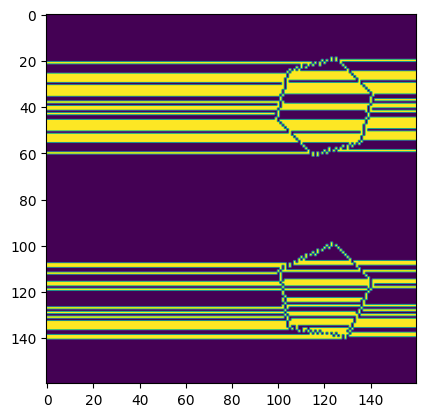

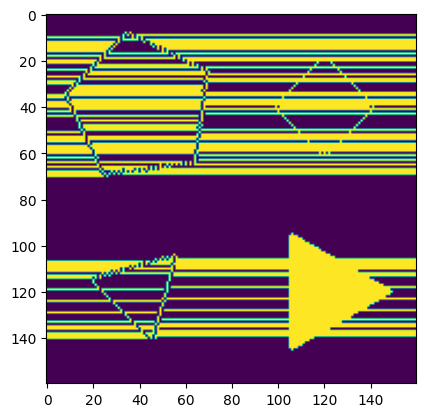

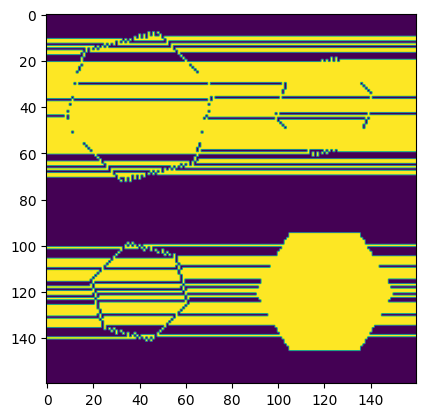

[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]


In [2]:
# Generalized components v1: 3.5s / 63.6s
path = '../RAVEN/new_data_0'
subtype = '*'
items = sorted([x.split('.xml')[0] for x in glob.glob(os.path.join(path, subtype, '*.xml'))])
# print(items)
correct = 0
debug=True
global_counts = [0 for _ in rule_order]
if debug:
    items=['../RAVEN/new_data_0/distribute_four/RAVEN_15_train']
for index, item in tqdm(enumerate(items), total=len(items)):
    x = load_question2(item, display=True, debug=False)
    print(x)
    break
    embeddings, embedding_names, answer = load_question2(item, display=False, debug=False)
    print(embeddings)
    if any(len(embedding) != len(embeddings[0]) for embedding in embeddings):
        print("Error!", item, " has embeddings of different lengths")
        break
    guess, counts, _ = predict(embeddings,embedding_names,debug=False)
    global_counts = [global_counts[i] + counts[i] for i in range(5)]
    if guess == answer:
        correct += 1
        if debug:
            print("Guessed orrect answer", answer, embeddings[8+answer])
    else:
        if debug:
            grid = [[0, 1, 2], [3, 4, 5], [6, 7, None]]
            print("\n".join([str([embeddings[col] if col is not None else None for col in row ]) for row in grid]))
            print("Answer", answer, embeddings[8+answer], "Guess", guess, embeddings[8+guess] if guess is not None else None)
        print("WRONG",item, "Wrong guess", guess, "Correct answer", answer)